In [1]:
## 1.4 Pomocí knihovny matplotlib vykreslit jednotlivé číslice. 

## Dále zkus vykreslit pro každou číslici (třídu) zvlášť:

#1.4b: průměr přes všechny vzorky

#1.4c: maximální hodnotu pro každý pixel přes všechny vzorky (to nám řekne, kam až daná číslice může zasahovat)

#1.4d: unikátní pixely (pokud vůbec existují) - pixely, která jsou nenulové pro vzorky jen té jediné třídy (u všech ostatních tříd jsou pro všechny vzorky nulové) - to nám ukáže důležité příznaky, které rozhodují o klasifikaci dané třídy (číslice)

#1.4e: Pro každý pixel v obrázku 28x28 znázornit, kolik tříd je na něm aktivních = alespoň jeden vzorek zde má nenulovou hodnotu (případně alespoň 10 vzorků / alespoň 100 vzorků / ... , abychom vyřadili outliers)


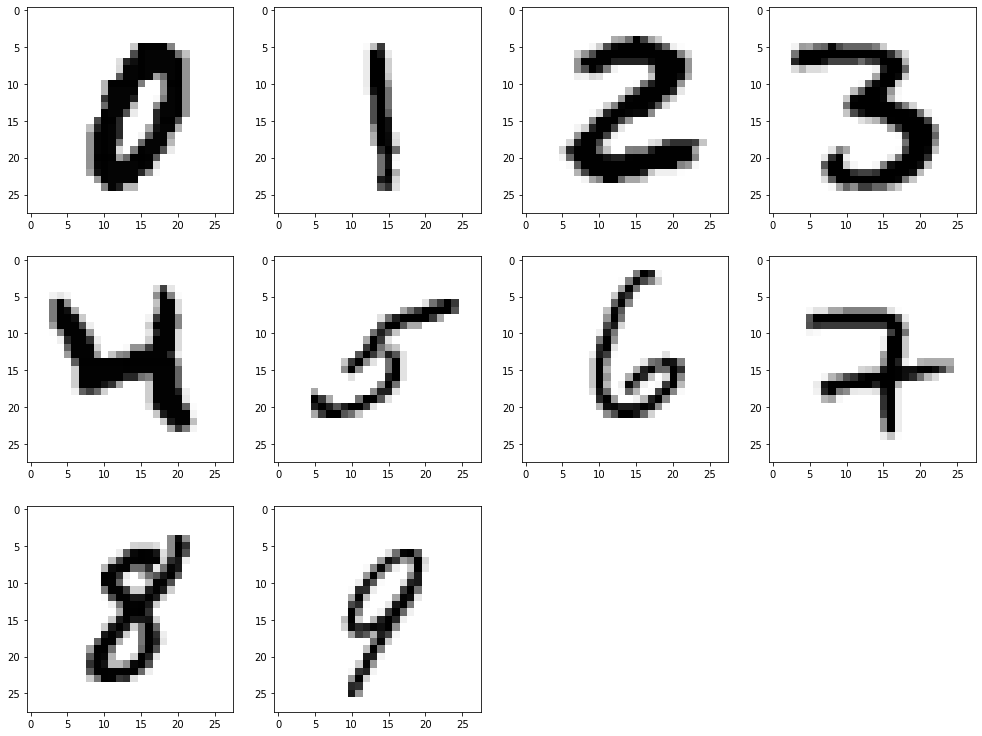

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as pyplot

num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

classes = [[], [], [], [], [], [], [], [], [], []] #lepsi inicializace se mi bohuzel nepovedla najit
# classes = [[] for i in range(10)] ## [kitt] možná...?

for i, y in enumerate(y_train):
    classes[y].append(x_train[i])

for i in range(10):
    pyplot.subplot(3, 4, 1 + i)
    pyplot.imshow(classes[i][2], cmap=pyplot.cm.gray_r)  ## [kitt] index 2 (třetí vzorek) je volba
    pyplot.gcf().set_size_inches(17, 13)
pyplot.show()


[kitt] Dvě poznámky přímo v kódu ve formě komentářů. Pro tento úkol ještě není třeba shromažďovat všechny vzorky (vykreslujeme jen třetí, index 2), ale je to připravené pro další úkoly. Tak super.

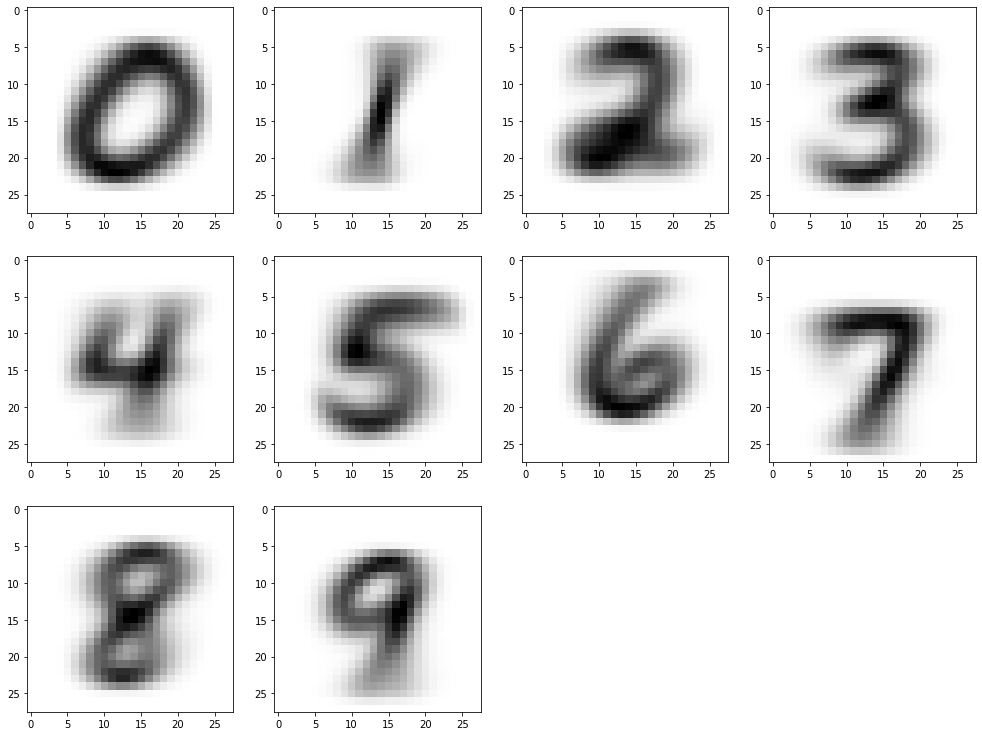

In [7]:
# průměr přes všechny vzorky
averages = []
for number in range(10):
    samples = classes[number]
    average = [[0 for x in range(28)] for y in range(28)]

    for s in samples:
        for row in range(28):
            for col in range(28):
                average[row][col] += s[row][col]

    for row in range(28):
        for col in range(28):
            average[row][col] /= len(samples)
    averages.append(average)

# averages = [np.mean(samples_one_class, axis=0) for samples_one_class in classes]  ## [kitt] code above using np

for i in range(10):
    pyplot.subplot(3, 4, 1 + i)
    pyplot.imshow(averages[i], cmap=pyplot.cm.gray_r)
    pyplot.gcf().set_size_inches(17, 13)
pyplot.show()

[kitt] Super, je skvělé, že se orientuješ v těch maticích a dokážeš průměry v cyklech napočítat. Většinou ale budeš spíš používat implementované optimalizované funkce, v tomto případě zafunguje np.mean() - viz komentář v kódu.

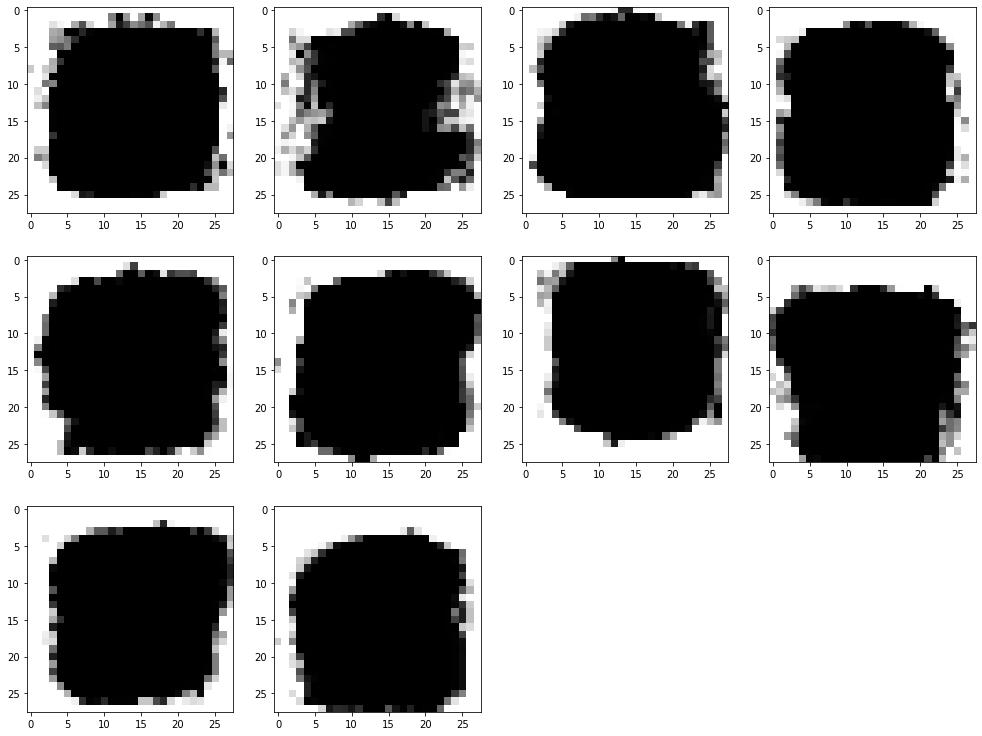

In [11]:
# maximální hodnotu pro každý pixel přes všechny vzorky
maximums = []
for number in range(10):
    samples = classes[number]
    maxes = [[0 for x in range(28)] for y in range(28)]

    for s in samples:
        for row in range(28):
            for col in range(28):
                maxes[row][col] = max(s[row][col], maxes[row][col])
    maximums.append(maxes)
    
# maximums = [np.max(samples_one_class, axis=0) for samples_one_class in classes]  ## [kitt] using np
    
for i in range(10):
    pyplot.subplot(3, 4, 1 + i)
    pyplot.imshow(maximums[i], cmap=pyplot.cm.gray_r)
    pyplot.gcf().set_size_inches(17, 13)
pyplot.show()

[kitt] Totéž jako předchozí buňka, komentář přímo v kódu.

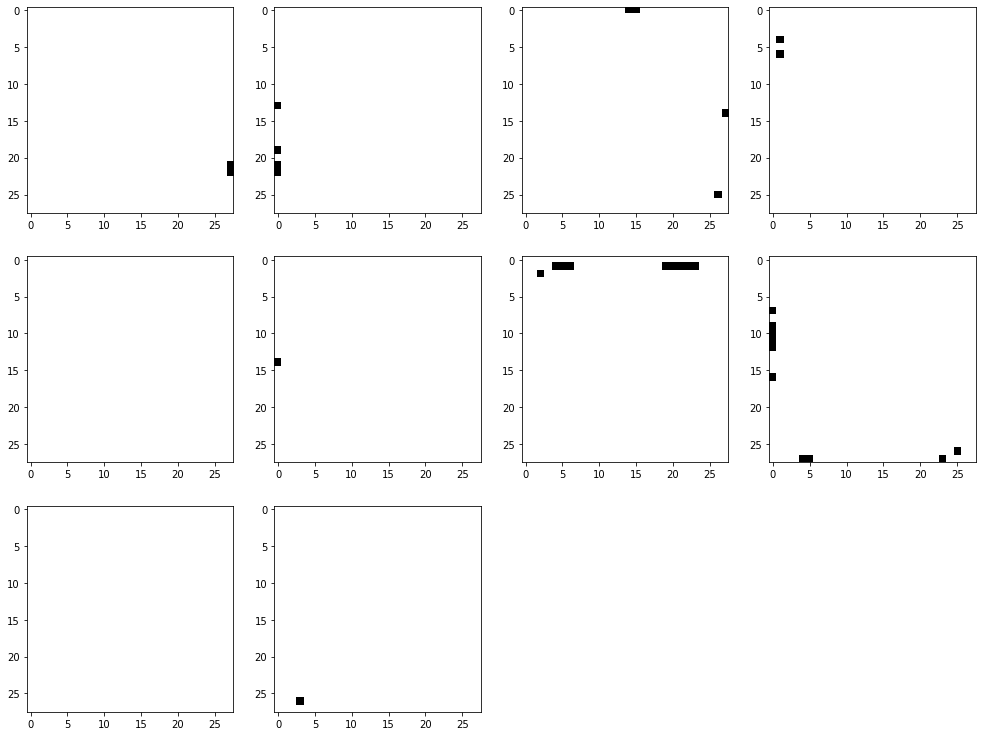

In [5]:
# unikátní pixely
uniques = []
for number in maximums:
    unique_pixs = [[0 for x in range(28)] for y in range(28)]
    for row in range(28):
        for col in range(28):
            if number[row][col] == 0:
                continue
            unique_pix = True
            for val in maximums:
                if val == number:
                    continue
                if val[row][col] != 0:
                    unique_pix = False
            if unique_pix:
                unique_pixs[row][col] = 255
    uniques.append(unique_pixs)
       
for i in range(10):
    pyplot.subplot(3, 4, 1 + i)
    pyplot.imshow(uniques[i], cmap=pyplot.cm.gray_r)
    pyplot.gcf().set_size_inches(17, 13)
pyplot.show()

[kitt] Perfektně napsáno. Bohužel v tomto případě z výsledků není vidět žádný "vyšší smysl", např. proč má jednotka unikátní pixely vpravo dole... Ale jako procvičení analýzy dat dobré.

Aktivní je alespoň jeden vzorek.


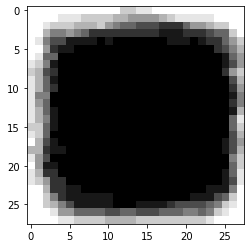

0  0  0  0  0  0  0  0  0  0  0  0  2  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  1  1  1  2  2  2  2  3  3  4  4  4  4  3  2  1  1  1  1  1  0  0  0  0  
0  0  1  2  2  2  3  3  3  2  4  5  6  6  7  7  7  8  8  8  6  4  4  3  2  2  0  0  
0  0  3  5  5  4  5  6  8  8  8  8  8  8  8  8  8  9  9  9  8  8  8  7  6  6  2  0  
0  1  5  7  7  9  9  9  9  10 9  10 10 10 10 10 10 10 9  9  9  10 9  8  8  6  4  2  
0  0  4  8  9  9  10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 8  7  5  3  
0  1  6  6  10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 9  6  4  
1  2  5  9  10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 9  7  4  
2  3  7  8  10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 8  4  2  
1  3  6  9  10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 7  3  
1  3  6  8  10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 8  4  
1  5  5  10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10

In [ ]:
# Pro každý pixel v obrázku 28x28 znázornit, kolik tříd je na něm aktivních
print('Aktivní je alespoň jeden vzorek.')
active_pixs = [[0 for x in range(28)] for y in range(28)]
for row in range(28):
    for col in range(28):
        for val in maximums:
            if val[row][col] != 0:
                active_pixs[row][col] += 1
                
# active_pixs = np.count_nonzero(maximums, axis=0) ## [kitt] našel jsem tuto funkci, měla by dělat totéž

pyplot.imshow(active_pixs, cmap=pyplot.cm.gray_r)
pyplot.show()
for row in range(28):
    for col in range(28):
        s = str(active_pixs[row][col])
        print(f"{s : <2}", end=" ")
    print()

Aktivních je alespoň 10 vzorků.


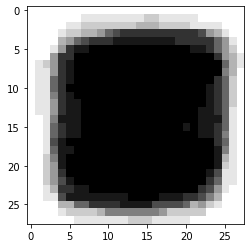

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  1  1  1  1  1  0  0  0  0  0  0  
0  0  0  0  0  1  1  2  2  2  2  2  2  2  3  3  3  2  2  2  2  1  1  1  1  0  0  0  
0  0  0  0  1  2  2  3  3  4  6  7  8  8  8  8  8  8  8  8  8  8  7  4  3  1  0  0  
0  0  0  0  3  4  6  7  8  8  8  9  9  9  9  9  9  9  9  8  8  8  8  8  6  4  1  0  
0  0  0  1  4  8  9  9  10 10 10 10 10 10 10 10 10 10 10 10 10 9  9  8  6  4  2  0  
0  0  0  4  8  8  10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 8  4  3  1  
0  1  2  4  8  9  10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 6  3  1  
0  1  1  4  8  9  10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 5  3  0  
0  1  1  6  8  9  10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 8  6  2  0  
0  1  1  6  8  10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 9  8  6  2  0  
0  1  1  5  8  9  10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10

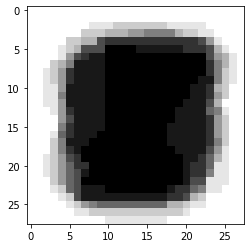

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  1  1  1  2  2  2  2  2  2  2  1  1  1  1  1  0  0  0  0  0  
0  0  0  0  0  0  0  2  2  2  3  3  3  4  4  5  5  5  5  3  2  2  1  1  0  0  0  0  
0  0  0  0  0  2  2  3  3  7  8  8  8  8  8  8  8  8  8  8  8  8  7  4  1  0  0  0  
0  0  0  0  1  2  3  7  7  7  10 10 10 10 9  9  9  9  9  9  8  8  8  7  3  1  0  0  
0  0  0  0  1  4  7  8  9  9  10 10 10 10 10 10 10 10 10 10 10 10 10 7  4  3  1  0  
0  0  0  2  3  5  9  9  9  9  10 10 10 10 10 10 10 10 10 10 10 10 10 8  5  3  1  0  
0  0  1  2  4  8  9  9  9  9  10 10 10 10 10 10 10 10 10 10 10 10 10 8  5  2  1  0  
0  0  1  2  4  8  9  9  9  9  10 10 10 10 10 10 10 10 10 10 10 10 9  9  5  2  1  0  
0  0  1  1  4  9  9  9  9  9  10 10 10 10 10 10 10 10 10 10 10 9  9  8  3  2  0  0  
0  0  1  1  5  9  9  9  9  9  10 10 10 10 10 10 10 10 10 10 10 9 

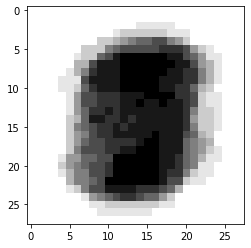

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1  2  2  2  2  2  2  1  1  1  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  2  2  3  4  5  6  6  7  7  5  4  2  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  2  2  2  5  6  7  7  7  7  7  8  8  8  7  4  2  1  0  0  0  0  
0  0  0  0  0  0  1  2  2  6  7  9  10 10 10 10 10 10 9  9  7  6  4  1  1  0  0  0  
0  0  0  0  0  0  3  3  7  9  9  9  10 10 10 10 10 10 10 9  9  7  4  3  1  0  0  0  
0  0  0  0  0  1  3  5  8  9  9  9  10 10 10 10 10 10 9  9  8  8  5  3  1  0  0  0  
0  0  0  0  1  1  1  7  9  9  9  9  10 10 10 10 10 9  9  9  8  8  5  3  1  0  0  0  
0  0  0  0  1  1  2  6  8  9  9  9  10 10 10 10 10 9  9  8  8  6  3  2  0  0  0  0  
0  0  0  0  0  1  4  7  7  8  8  8  9  9  9  10 10 10 10 8  8  7 

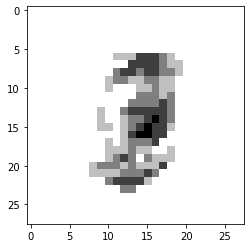

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1  1  1  3  3  3  2  1  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  3  3  3  3  2  1  1  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  2  3  3  2  3  3  2  2  1  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  1  2  2  1  1  2  2  1  1  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  2  1  1  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  2  2  1  2  0  0  0 

In [25]:
# (případně alespoň 10 vzorků / alespoň 100 vzorků / ... ,)
def find_uniques(count):
    global row, col, number, samples, s  ## [kitt] Akorát této řádce úplně nerozumím, je nutná? global se prakticky nepoužívá...
    active_pixs = [[0 for x in range(28)] for y in range(28)]
    for row in range(28):
        for col in range(28):
            for number in classes:
                samples = 0
                for val in number:
                    if val[row][col] != 0:
                        samples += 1
                    if samples >= count:
                        active_pixs[row][col] += 1
                        break
                       
    # active_pixs = np.count_nonzero([np.count_nonzero(samples_one_class, axis=0) >= count for samples_one_class in classes], axis=0)  ## [kitt]
                        
    pyplot.imshow(active_pixs, cmap=pyplot.cm.gray_r)
    pyplot.show()
    for row in range(28):
        for col in range(28):
            s = str(active_pixs[row][col])
            print(f"{s : <2}", end=" ")
        print()

print('Aktivních je alespoň 10 vzorků.')        
find_uniques(10)
print('Aktivních je alespoň 100 vzorků.') 
find_uniques(100)
print('Aktivních je alespoň 1000 vzorků.') 
find_uniques(1000)
print('Aktivních je alespoň 5000 vzorků.') 
find_uniques(5000)

[kitt] Bezva, tohle už je zajímavá analýza. Víme, které příznaky (pixely) jsou důležité a které méně a dokonce víme, který pixel je důležitý pro kterou třídu. Dobrá práce. 

Do kódu jsem zase jen pro ukázku přidal, jak je možné pracovat v Pythonu s maticemi a generátory... :-)